In [12]:
import numpy as np
from matplotlib import pyplot as plt
import wordcloud
from bs4 import BeautifulSoup


In [13]:
with open("data/song_files/rolling+blackouts+coastal+fever_an+air+conditioned+man.html", "r", encoding='utf-8') as f:
    html_string= f.read()
    
soup = BeautifulSoup(html_string)
text = soup.find('pre', attrs={'class': 'lyric-body'}).text

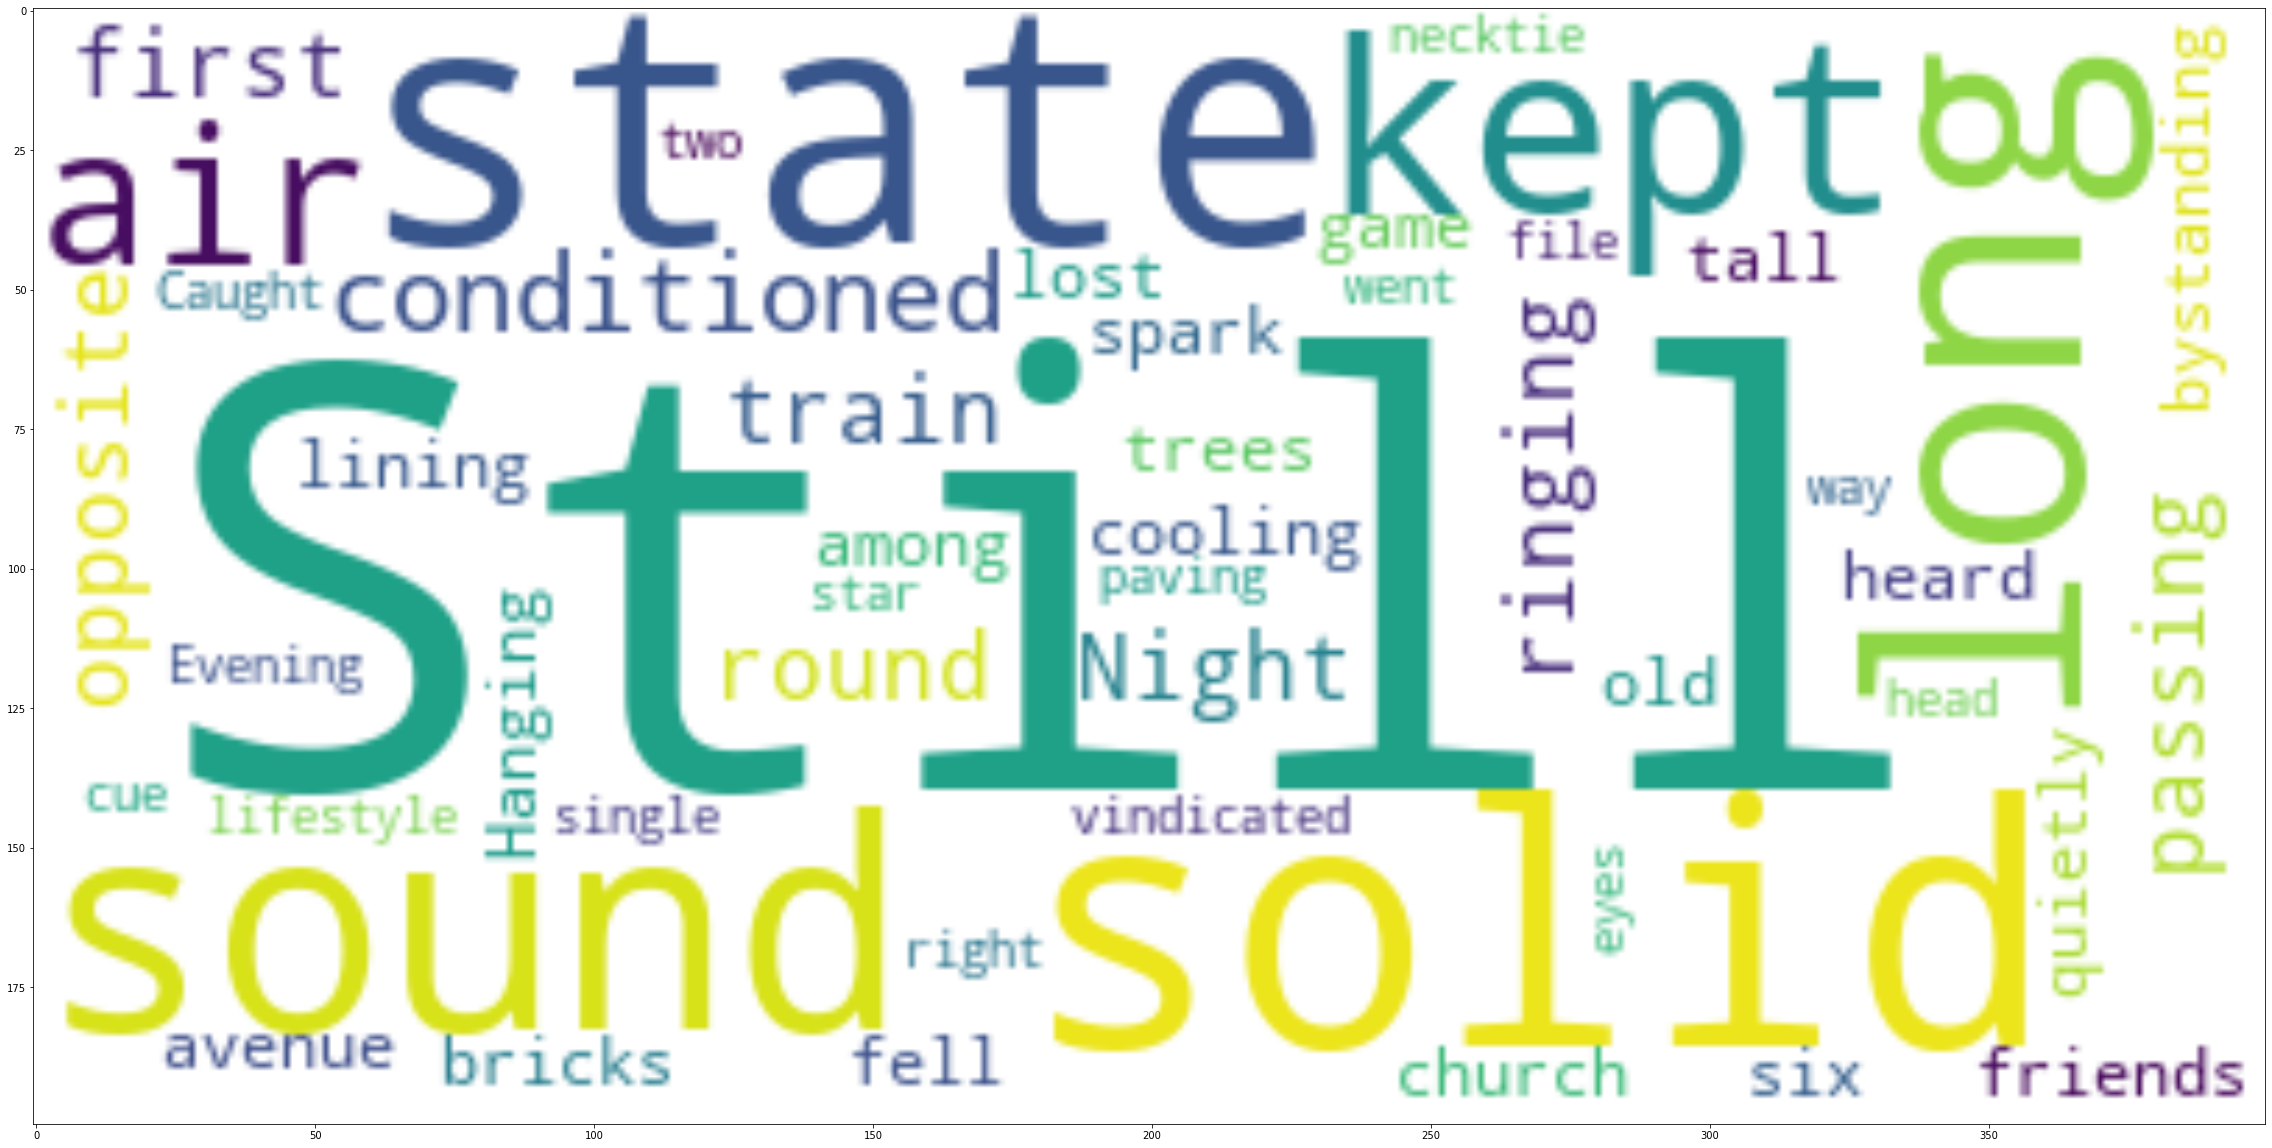

In [17]:
# to apply own mask
# from PIL import Image
#mask = np.array(Image.open('my_image.jpg'))


mask = np.zeros((500, 500, 3), np.uint8)
mask[150:350,150:350,:] = 255  # masked out area

cloud = wordcloud.WordCloud(background_color="white",
                max_words=50,
                #mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(text)
                # stop words are removed!

plt.figure(figsize = (40,40))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('cloud.png')
plt.show()

In [19]:
import os
import re

lyrics_list = []
artist_list = []
for filename in os.listdir('data/song_files'):
    #print(filename)
    html_string = open('data/song_files/' + filename).read()
    
    # convert to BeautifulSoup object
    soup_object = BeautifulSoup(html_string)
    lyrics = soup_object.find('pre', attrs={'class': 'lyric-body'}).text
    lyrics_list.append(lyrics)

In [20]:
import spacy

In [21]:
nlp = spacy.load('en_core_web_md')

In [22]:
# function from the lecture
def clean_text(corpus, model):
    """preprocess a string (tokens, stopwords, lowercase, lemma & stemming) returns the cleaned result
        params: review - a string
                model - a spacy model
                
        returns: list of cleaned strings
    """
    
    new_doc = []
    doc = model(corpus)
    for word in doc:
        if not word.is_stop and word.is_alpha:
            new_doc.append(word.lemma_.lower())
            
    return new_doc

In [23]:
song_spacy = []
for corpus in lyrics_list:
    song_cleaned = clean_text(corpus, nlp)
    song_spacy.append(song_cleaned)

In [34]:
from functools import reduce 
flat_lyrics = reduce(lambda x, y: x.extend(y), [song_spacy])
flat_lyrics[1]

['step',
 'town',
 'ignore',
 'stink',
 'burn',
 'leather',
 'young',
 'right',
 'radio',
 'sing',
 'cool',
 'life',
 'forever',
 'depend',
 'weather',
 'shadow',
 'tall',
 'lean',
 'wall',
 'wait',
 'wait',
 'set',
 'hour',
 'meet',
 'cappuccino',
 'city',
 'roach',
 'climb',
 'wall',
 'coffee',
 'cold',
 'service',
 'shitty',
 'neon',
 'light',
 'look',
 'pretty',
 'race',
 'run',
 'longer',
 'have',
 'fun',
 'short',
 'memory',
 'short',
 'memory',
 'fm',
 'stereo',
 'belgians',
 'congo',
 'short',
 'memory',
 'cappuccino',
 'city']

In [35]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
        
  
string_list = []
for i in flat_lyrics:
    flat = listToString(i)
    string_list.append(flat)
    

In [39]:
final = ' '.join(string_list)    

In [18]:
# create wordcloud for all words

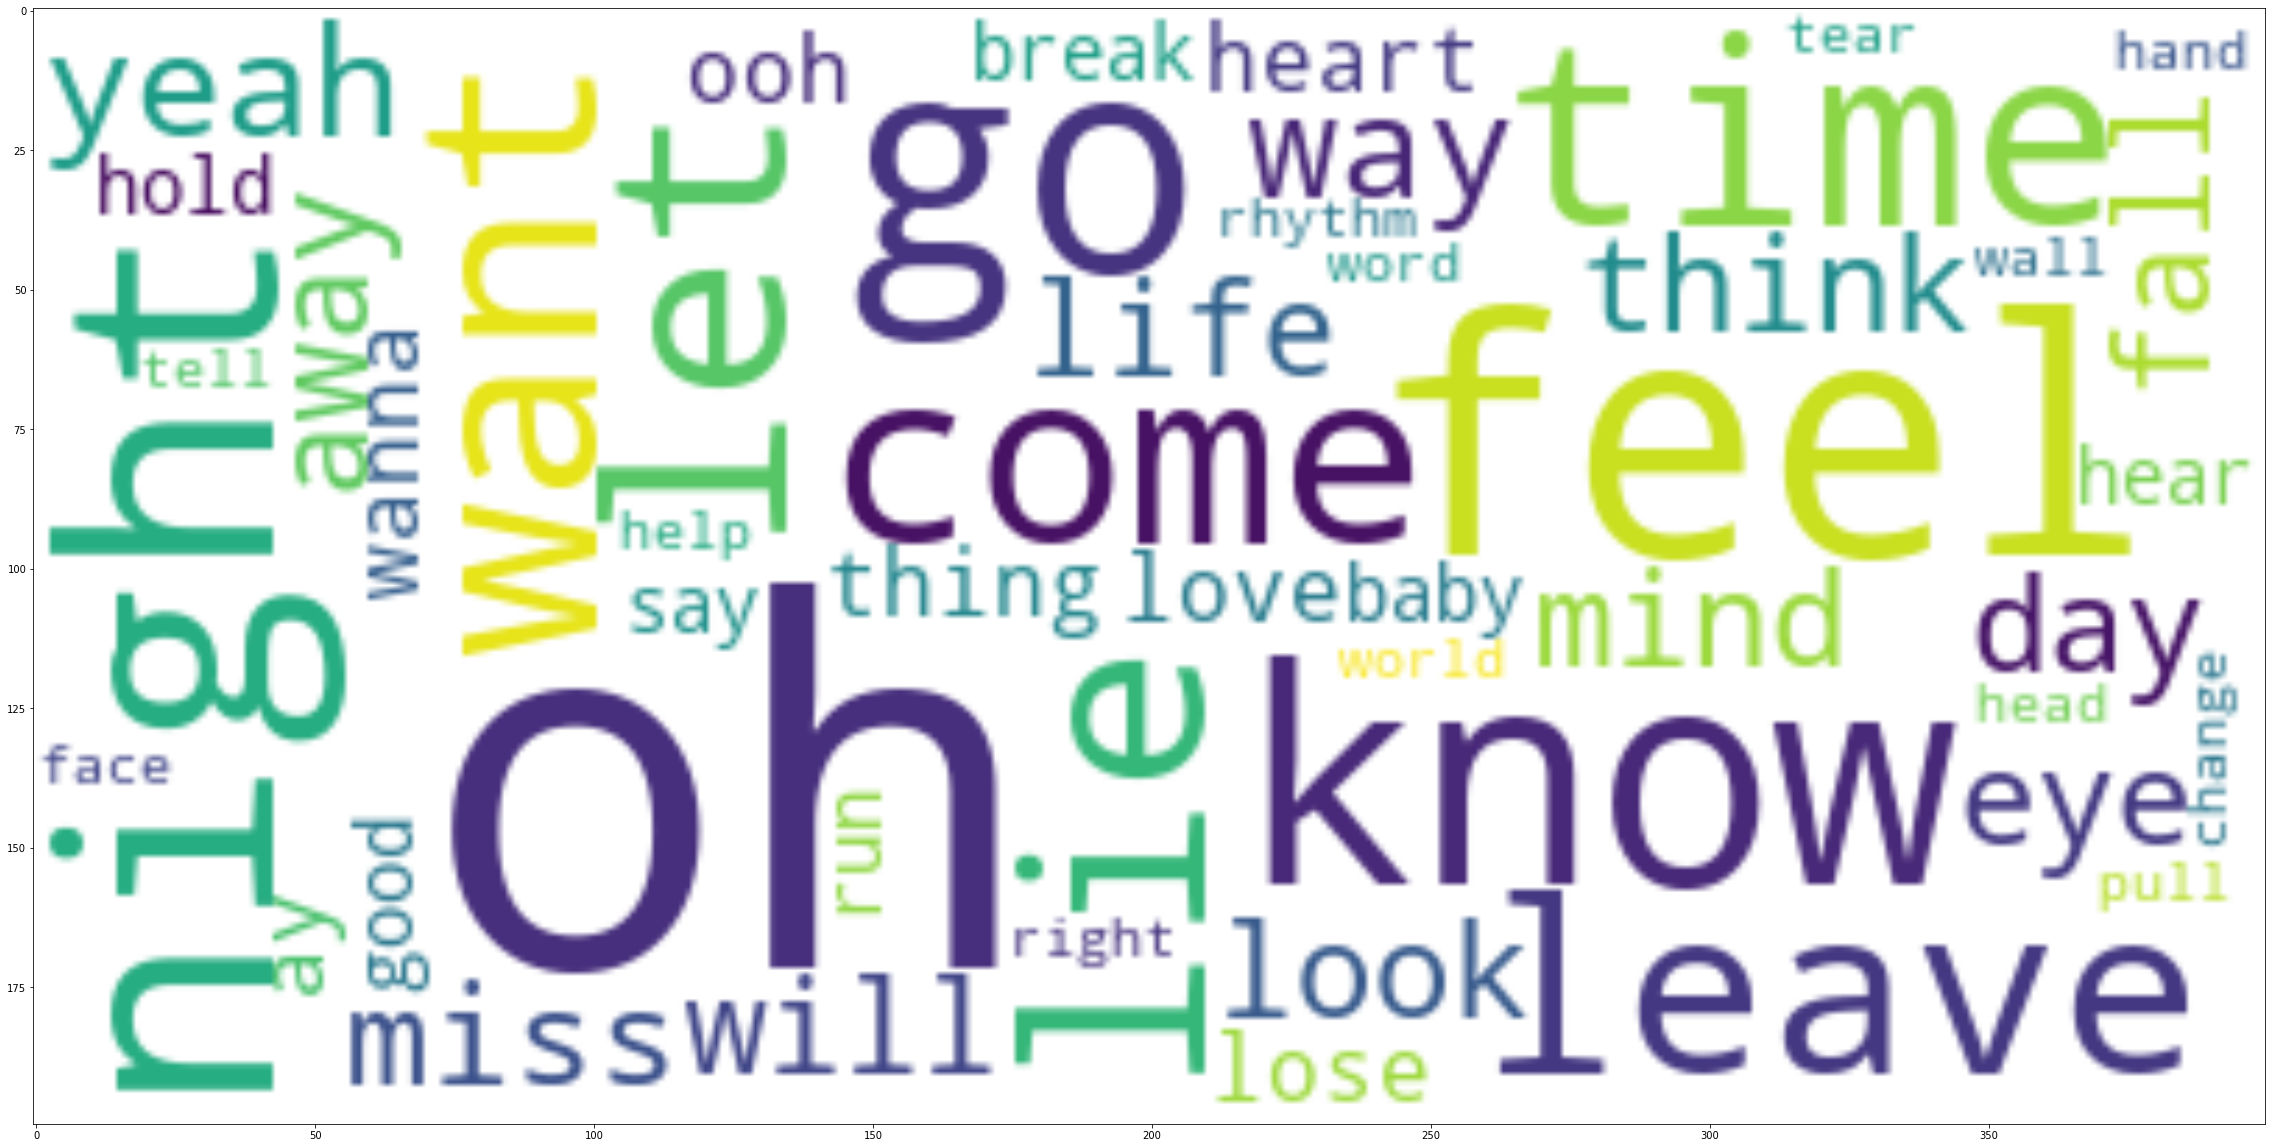

In [40]:
cloud = wordcloud.WordCloud(background_color="white",
                max_words=50,
                #mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(final)
                # stop words are removed!

plt.figure(figsize = (40,40))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('cloud.png')
plt.show()